In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducible results
np.random.seed(0)

# Generate a dataset with random numbers
dataset = np.random.rand(100, 2)

# Split the dataset into X and y
X = dataset[:, 0].reshape(-1, 1)
y = dataset[:, 1].reshape(-1, 1)

In [3]:
# Train a linear regression model using |x-xhat|3 as the loss function
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.zeros((1,))

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, np.power(np.abs(y_pred - y), 2))
            db = (1 / n_samples) * np.sum(np.power(np.abs(y_pred - y), 2))
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
# Train a polynomial regression model using |x-xhat|7 as the loss function
class PolynomialRegressionCustom:
    def __init__(self, degree=2, learning_rate=0.001, n_iters=1000):
        self.degree = degree
        self.lr = learning_rate
        self.n_iters = n_iters

    def fit(self, X, y):
        poly_features = PolynomialFeatures(degree=self.degree)
        X_poly = poly_features.fit_transform(X)
        n_samples, n_features = X_poly.shape
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.zeros((1,))

        for _ in range(self.n_iters):
            y_pred = np.dot(X_poly, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X_poly.T, np.power(np.abs(y_pred - y), 6))
            db = (1 / n_samples) * np.sum(np.power(np.abs(y_pred - y), 6))
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        poly_features = PolynomialFeatures(degree=self.degree)
        X_poly = poly_features.fit_transform(X)
        return np.dot(X_poly, self.weights) + self.bias

In [5]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [6]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [7]:
lin_reg_custom = LinearRegressionCustom()
lin_reg_custom.fit(X_train, y_train)
y_pred_lin_custom = lin_reg_custom.predict(X_test)

In [8]:
poly_reg_custom = PolynomialRegressionCustom(degree=2)
poly_reg_custom.fit(X_train, y_train)
y_pred_poly_custom = poly_reg_custom.predict(X_test)

In [9]:
# Train a linear regression model using the sklearn library
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X_train, y_train)
y_pred_lin_sklearn = lin_reg_sklearn.predict(X_test)

In [10]:
X_test.shape

(20, 1)

In [12]:
y_test.shape

(20, 1)

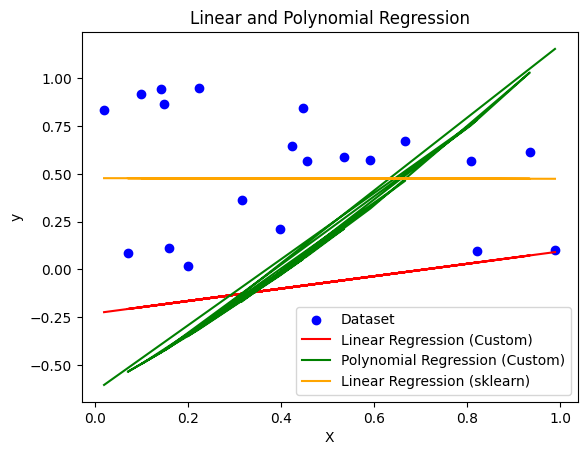

In [13]:
# Plot the dataset and curves obtained from all models
plt.scatter(X_test, y_test, color='blue', label='Dataset')
plt.plot(X_test, y_pred_lin_custom, color='red', label='Linear Regression (Custom)')
plt.plot(X_test, y_pred_poly_custom, color='green', label='Polynomial Regression (Custom)')
plt.plot(X_test, y_pred_lin_sklearn, color='orange', label='Linear Regression (sklearn)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear and Polynomial Regression')
plt.legend()
plt.show()
